# Week 2 – Project  
## Time Series & Category Charts using Walmart Sales Data

**Objective:**  
To analyze Walmart sales data using time series and category-based visualizations.

**Dataset:**  
Walmart Sales Forecast Metadata

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [17]:
df = pd.read_csv("train.csv")
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


## Dataset Overview

This section examines the structure and basic properties of the dataset.

In [18]:
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


## Time Series Analysis

The dataset contains weekly sales data.  
Time series analysis is performed to study how Walmart sales change over time.

In [20]:
sales_over_time = (
    df.groupby('Date')['Weekly_Sales']
      .sum()
      .reset_index()
)

sales_over_time.head()

,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30


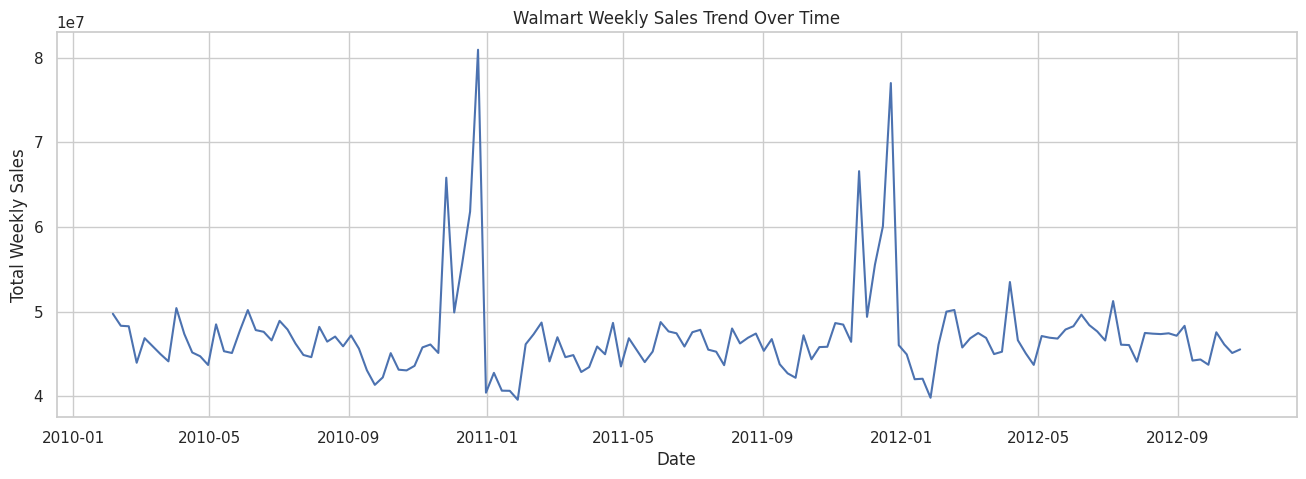

In [21]:
plt.figure(figsize=(16,5))
plt.plot(sales_over_time['Date'], sales_over_time['Weekly_Sales'])

plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.title("Walmart Weekly Sales Trend Over Time")

plt.savefig("walmart_sales_time_series.png", dpi=300, bbox_inches="tight")
plt.show()

## Category-wise Sales Analysis

This section compares sales performance across different Walmart store types.

In [23]:
stores = pd.read_csv("stores.csv")
df_merged = df.merge(stores, on="Store")
df_merged.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


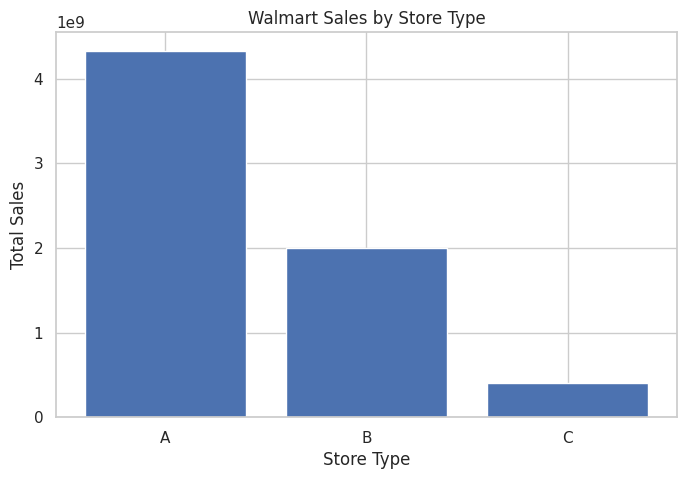

In [24]:
store_sales = (
    df_merged.groupby('Type')['Weekly_Sales']
      .sum()
)

plt.figure(figsize=(8,5))
plt.bar(store_sales.index, store_sales.values)

plt.xlabel("Store Type")
plt.ylabel("Total Sales")
plt.title("Walmart Sales by Store Type")

plt.savefig("walmart_sales_by_store_type.png", dpi=300, bbox_inches="tight")
plt.show()

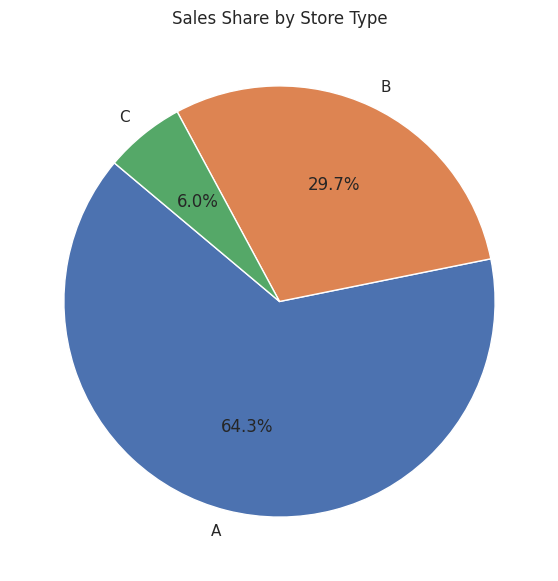

In [25]:
plt.figure(figsize=(7,7))
plt.pie(
    store_sales.values,
    labels=store_sales.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title("Sales Share by Store Type")

plt.savefig("walmart_store_type_sales_share.png", dpi=300, bbox_inches="tight")
plt.show()

## Chart Choice and Aggregation

Since the dataset contains weekly sales data, time series analysis was performed using weekly aggregation.
Line charts were used to visualize sales trends over time.
Bar charts were used to compare sales across store types.
Pie charts were used to represent the sales share of each store type.

Clear titles, axis labels, and consistent formatting were applied to improve readability.

## Project Summary

This project analyzed Walmart sales data using time series and category-based visualizations.
Weekly sales trends were examined using a line chart, while store-type performance was analyzed using bar and pie charts.

The analysis demonstrates how data visualization techniques help identify trends and category-wise performance in retail sales data.